# FitzHugh–Nagumo Equation 
This code was taken from [IPython Cookbook](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/).

## Section 1: The original code

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [85]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step
T = 9.0  # total time
dt = .001  # time step

In [86]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [87]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [88]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

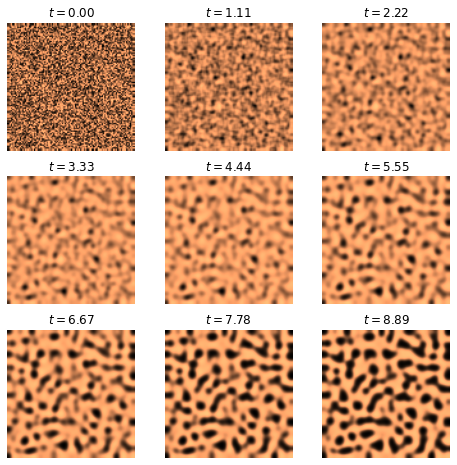

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
n = 100*size
step_plot = n // 9

# We simulate the PDE with the finite difference method 
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

## Section 2: Modified Code for the Brusselator Equation

i= 0 

i= 11111 

i= 22222 

i= 33333 

i= 44444 

i= 55555 

i= 66666 

i= 77777 

i= 88888 



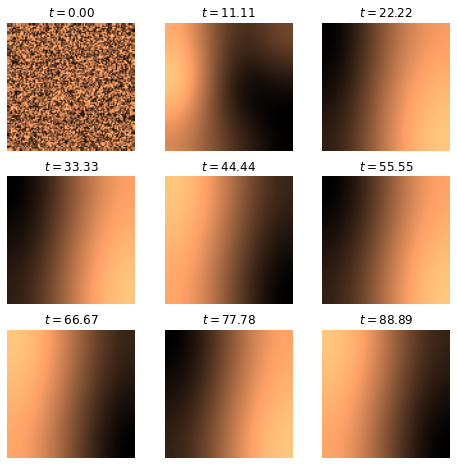

In [82]:
# Diffusion constant in x and y direction 
Dx = 0.02 
Dy = 0.02 
# Reaction constants 
A = 1
B = 3 
# Space discretization 
size = 100  # size of the 2D grid
dx = 2. / size  # space step
# Time discretization 
T = 9.0  # total time
dt = .001  # time step
# Initial concentrations 
U = np.random.rand(size, size)
V = np.random.rand(size, size)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
n = 1000*size
step_plot = n // 9

# We simulate the PDE with the finite difference method.
for i in range(n):
#    print("i=",i,"\n")
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (Dx * deltaU + A + Uc**2*Vc - B*Uc - Uc),\
        Vc + dt * (Dy * deltaV + B*Uc - Uc**2*Vc)
#    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
#        Uc + dt * (Dx * deltaU ),\
#        Vc + dt * (Dy * deltaV )
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        print("i=",i,"\n")
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')